In [4]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os, joblib
print("LIbraries imported")

LIbraries imported


In [5]:

df = pa.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [7]:
df.duplicated().sum()

np.int64(172)

In [8]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [9]:
# Remove rows with missing values
df.dropna(inplace=True)


In [10]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [11]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [12]:
print("Female")
female = df[df['Gender'] == 'Female']
female['Customer Type'].value_counts()


Female


Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [13]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [14]:
print("Male")
Male = df[df['Gender'] == 'Male']
Male['Customer Type'].value_counts()

Male


Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

In [15]:
# classification of balance and imbalance dataset
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

<h4>Why to check balance and imbalance dataset?</h4>

In [16]:
keys = list(df['Class'].value_counts().keys())
values = list(df['Class'].value_counts().values)

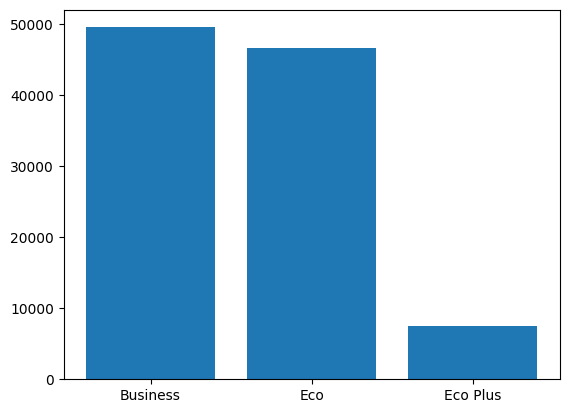

In [17]:
plt.bar(keys, values)
plt.show()

In [18]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


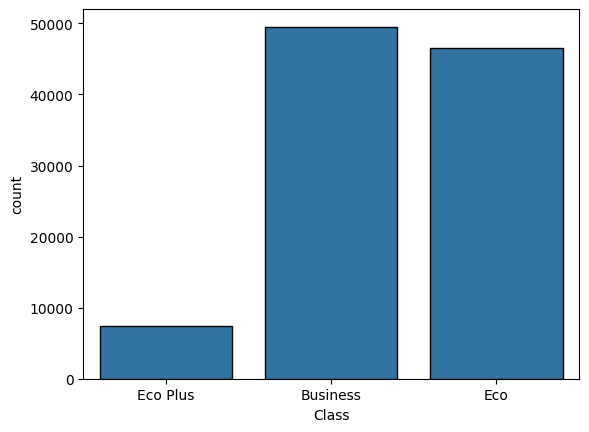

In [19]:
sns.countplot(data=df, x='Class', edgecolor='k')
plt.show()

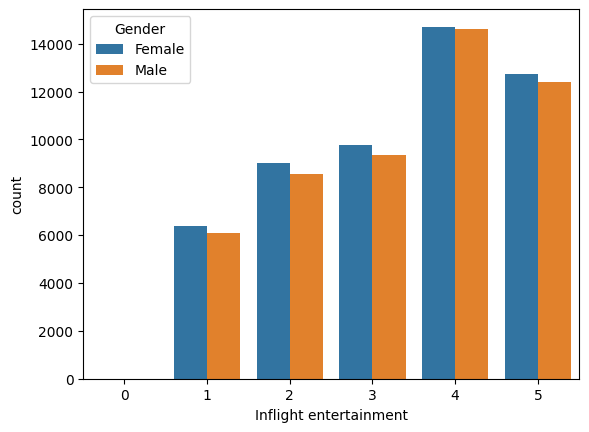

In [20]:
sns.countplot(x='Inflight entertainment', data=df, hue='Gender')
plt.show()

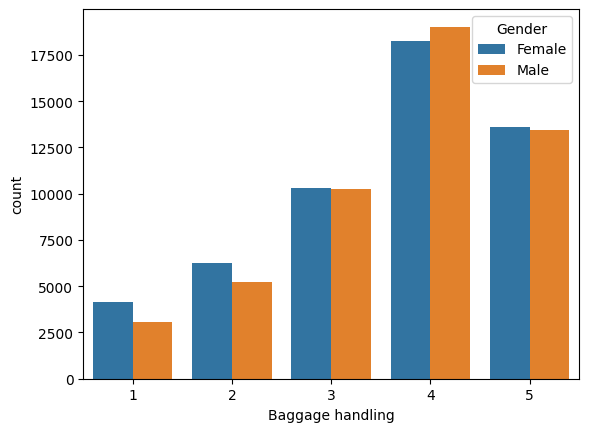

In [21]:
sns.countplot(x='Baggage handling', data=df, hue='Gender')
plt.show()

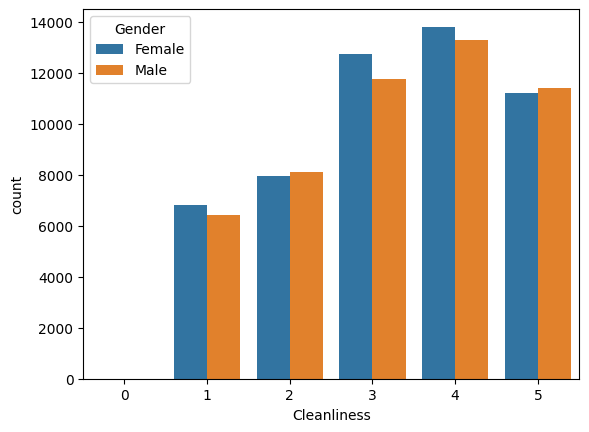

In [22]:
sns.countplot(x='Cleanliness', data=df, hue='Gender')
plt.show()

In [23]:
print(df.columns)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction',
       'Age', 'Flight Distance', 'Inflight entertainment', 'Baggage handling',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


<h3>Types of Encoding</h3>

<h4>1. Label Encoding</h4>

<h4>1. One hot Encoding</h4>

<h4>One hot encoding representation.</h4>

In [24]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
pa.get_dummies(df).astype(int)   # [astype] -> It will convert all column into integer type

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18,0,1,1,0,0,1,0,0,1,1,0
1,25,235,1,3,1,1,6,0,1,0,1,1,0,1,0,0,1,0
2,26,1142,5,4,5,0,0,1,0,1,0,1,0,1,0,0,0,1
3,25,562,2,3,2,11,9,1,0,1,0,1,0,1,0,0,1,0
4,61,214,3,4,3,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,1,0,0,1,1,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,0,1,1,0,1,0,1,0,0,0,1
103901,30,1995,4,4,4,7,14,0,1,0,1,1,0,1,0,0,1,0
103902,22,1000,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0


In [25]:
df2 = pa.get_dummies(df, drop_first='if_binary').astype(int)
df2

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [26]:
x = df2.drop('satisfaction_satisfied', axis='columns')
y =  df2[['satisfaction_satisfied']]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [29]:
# Model or Algorithm Training
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [30]:
lg.fit(x_train, y_train)

/Users/mihir/Desktop/Data_Science/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mihir/Desktop/Data_Science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
print("Training Score : " ,lg.score(x_train, y_train) * 100)
print("Testing Score : ", lg.score(x_test, y_test) * 100)

Training Score :  79.65490196078431
Testing Score :  79.12544041700855


<h5>This model is Generalized model with less score.</h5>

In [32]:
y_test.head(40)

,satisfaction_satisfied
17794,0
33463,1
94050,1
102858,1
22177,1
68881,1
76244,1
52638,0
75642,1
81880,1


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print(y_test.columns)


Index(['satisfaction_satisfied'], dtype='object')


In [35]:
print(x_train.columns)


Index(['Age', 'Flight Distance', 'Inflight entertainment', 'Baggage handling',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


In [36]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
92784,7,308,2,4,2,0,0,1,0,1,1,0
96456,35,1477,3,2,2,0,0,1,1,0,1,0
64366,21,1023,3,2,3,41,14,0,0,0,1,0
32801,46,177,3,3,3,0,0,0,0,0,0,0
25658,23,479,1,5,1,0,1,0,1,0,1,0


In [37]:
len(x_train.columns)

12

In [38]:
import joblib

In [39]:
joblib.dump(lg, 'logistic_regression.lb')

['logistic_regression.lb']